In [128]:
#import the necessary librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
data = pd.read_csv('immobilien.csv')

data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,energyEfficiencyClass,Last Refurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,3.0,4,True,4,NaN,NaN,NaN,NaN,NaN,43586
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,NaN,3,False,4,NaN,NaN,2019.0,NaN,NaN,43586
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,4.0,3,False,4,NaN,NaN,NaN,NaN,NaN,43739
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,NaN,3,False,2,87.23,NaN,NaN,NaN,NaN,43586
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,NaN,3,False,4,NaN,NaN,NaN,NaN,NaN,43862


In [125]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'pricetrend', 'telekomUploadSpeed',
       'totalRent', 'yearConstructed', 'noParkSpaces', 'firingTypes',
       'hasKitchen', 'geo_bln', 'cellar', 'baseRent', 'livingSpace', 'geo_krs',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'geo_plz', 'no of Rooms', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'heatingCosts',
       'energyEfficiencyClass', 'Last Refurbish', 'electricityBasePrice',
       'electricityKwhPrice', 'date'],
      dtype='object')

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [133]:
data.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,Last Refurbish,electricityBasePrice,electricityKwhPrice,date
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000,268850.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769,43663.170232
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667,180.324523
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500,43344.000000
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500,43586.000000
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500,43739.000000
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500,43862.000000
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600,43862.000000


In [134]:
#checking the missing values
data.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
lift                             0
baseRentRange                    0
typeOfFlat          

In [135]:
#filling the missing values in some columns with the mode
EBP_mode = data.electricityBasePrice.mode()[0]
EKP_mode = data.electricityKwhPrice.mode()[0]

data.electricityBasePrice.fillna(EBP_mode, inplace=True)
data.electricityKwhPrice.fillna(EKP_mode, inplace=True)

data.electricityBasePrice.isnull().sum()
data.electricityKwhPrice.isnull().sum()

0

In [136]:
#removing rows with missing total rent values
data.dropna(subset=['totalRent'], inplace=True)

In [137]:
data.dropna(subset=['baseRent'], inplace=True)

In [138]:
#removing some unneeded columns
data.drop(['telekomHybridUploadSpeed','thermalChar', 'yearConstructedRange','houseNumber',
          'scoutId','picturecount'], axis=1, inplace=True)

In [139]:
data = data.astype({"baseRent":"int64","totalRent":"int64","livingSpace":"int64"})

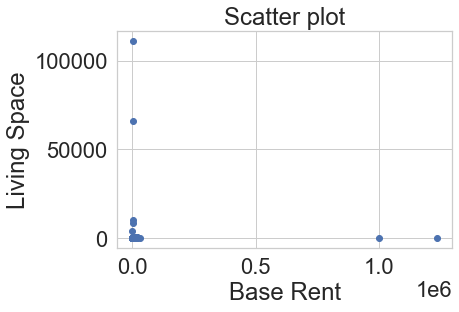

In [140]:
plt.xlabel('Base Rent')
plt.ylabel('Living Space')
plt.title('Scatter plot')
plt.scatter(x=data['baseRent'], y=data['livingSpace'])

In [141]:
data.regio1.value_counts(dropna=False)

Sachsen                   52170
Nordrhein_Westfalen       50759
Bayern                    18521
Sachsen_Anhalt            17747
Hessen                    14647
Baden_Württemberg         13380
Niedersachsen             12281
Berlin                     9744
Thüringen                  7337
Rheinland_Pfalz            6586
Brandenburg                6415
Mecklenburg_Vorpommern     5959
Schleswig_Holstein         5854
Hamburg                    3395
Bremen                     2517
Saarland                   1021
Name: regio1, dtype: int64

In [142]:
data.baseRent.describe()

count    2.283330e+05
mean     6.537605e+02
std      3.361442e+03
min      0.000000e+00
25%      3.350000e+02
50%      4.900000e+02
75%      7.950000e+02
max      1.234567e+06
Name: baseRent, dtype: float64

In [143]:
data.totalRent.describe()

count    2.283330e+05
mean     9.012545e+02
std      3.323833e+04
min      0.000000e+00
25%      4.690000e+02
50%      6.500000e+02
75%      9.850000e+02
max      1.575154e+07
Name: totalRent, dtype: float64

In [144]:
data.heatingType.value_counts(dropna=True)

central_heating                   109787
district_heating                   21310
gas_heating                        18270
floor_heating                      15662
self_contained_central_heating     14764
oil_heating                         4583
heat_pump                           2217
combined_heat_and_power_plant       1776
night_storage_heater                1140
wood_pellet_heating                  866
electric_heating                     733
stove_heating                        252
solar_heating                        150
Name: heatingType, dtype: int64

Making a correlation matrix

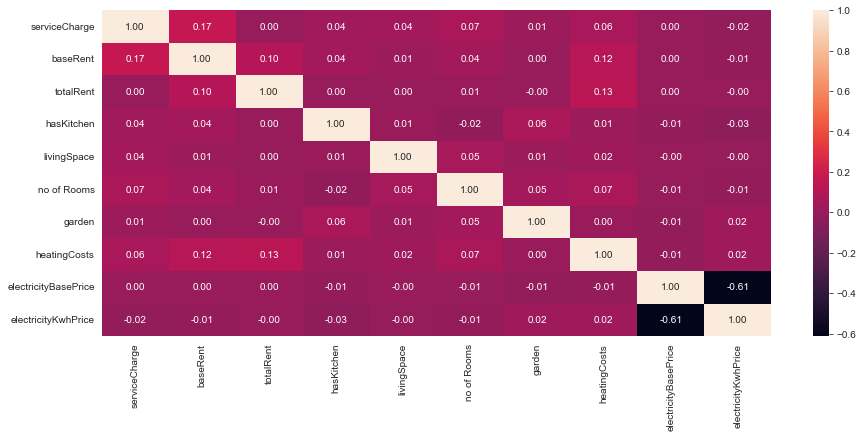

In [85]:
data_corr=data[['serviceCharge','baseRent','totalRent','hasKitchen','livingSpace','no of Rooms','garden',
      'heatingCosts','electricityBasePrice','electricityKwhPrice']].corr()
plt.figure(figsize=(15, 6))
sns.heatmap(data_corr, annot=True, fmt=".2f");

Checking number of houses with extra amenities like kitchen, park spaces, pets e.t.c

<AxesSubplot:xlabel='hasKitchen', ylabel='count'>

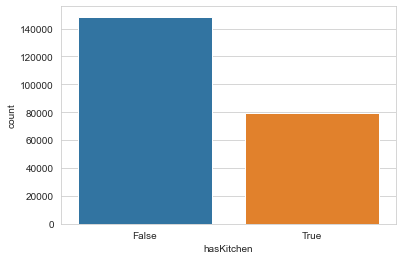

In [72]:
#check 
sns.set_style('whitegrid')
sns.countplot(x='hasKitchen', data=data)

<AxesSubplot:xlabel='balcony', ylabel='count'>

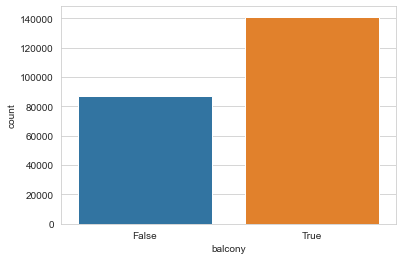

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='balcony', data=data)

<AxesSubplot:xlabel='cellar', ylabel='count'>

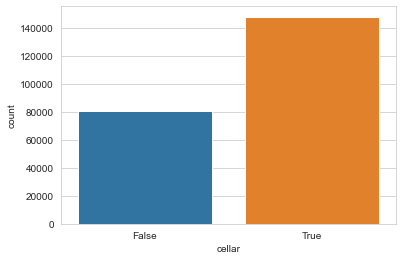

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='cellar', data=data)

<AxesSubplot:xlabel='petsAllowed', ylabel='count'>

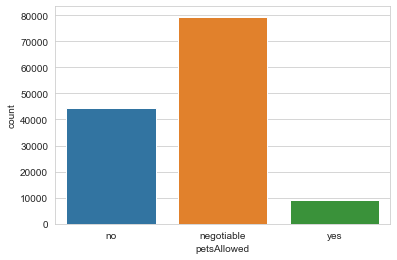

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='petsAllowed', data=data)

<AxesSubplot:xlabel='lift', ylabel='count'>

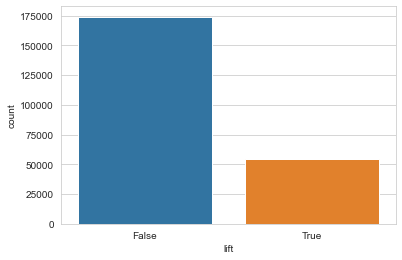

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='lift', data=data)

<AxesSubplot:xlabel='garden', ylabel='count'>

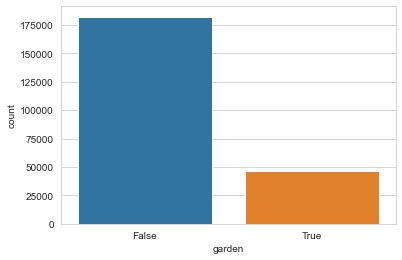

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='garden', data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Nordrhein_Westfalen'),
  Text(1, 0, 'Sachsen'),
  Text(2, 0, 'Bremen'),
  Text(3, 0, 'Baden_Württemberg'),
  Text(4, 0, 'Rheinland_Pfalz'),
  Text(5, 0, 'Thüringen'),
  Text(6, 0, 'Hessen'),
  Text(7, 0, 'Niedersachsen'),
  Text(8, 0, 'Schleswig_Holstein'),
  Text(9, 0, 'Bayern'),
  Text(10, 0, 'Hamburg'),
  Text(11, 0, 'Sachsen_Anhalt'),
  Text(12, 0, 'Mecklenburg_Vorpommern'),
  Text(13, 0, 'Berlin'),
  Text(14, 0, 'Brandenburg'),
  Text(15, 0, 'Saarland')])

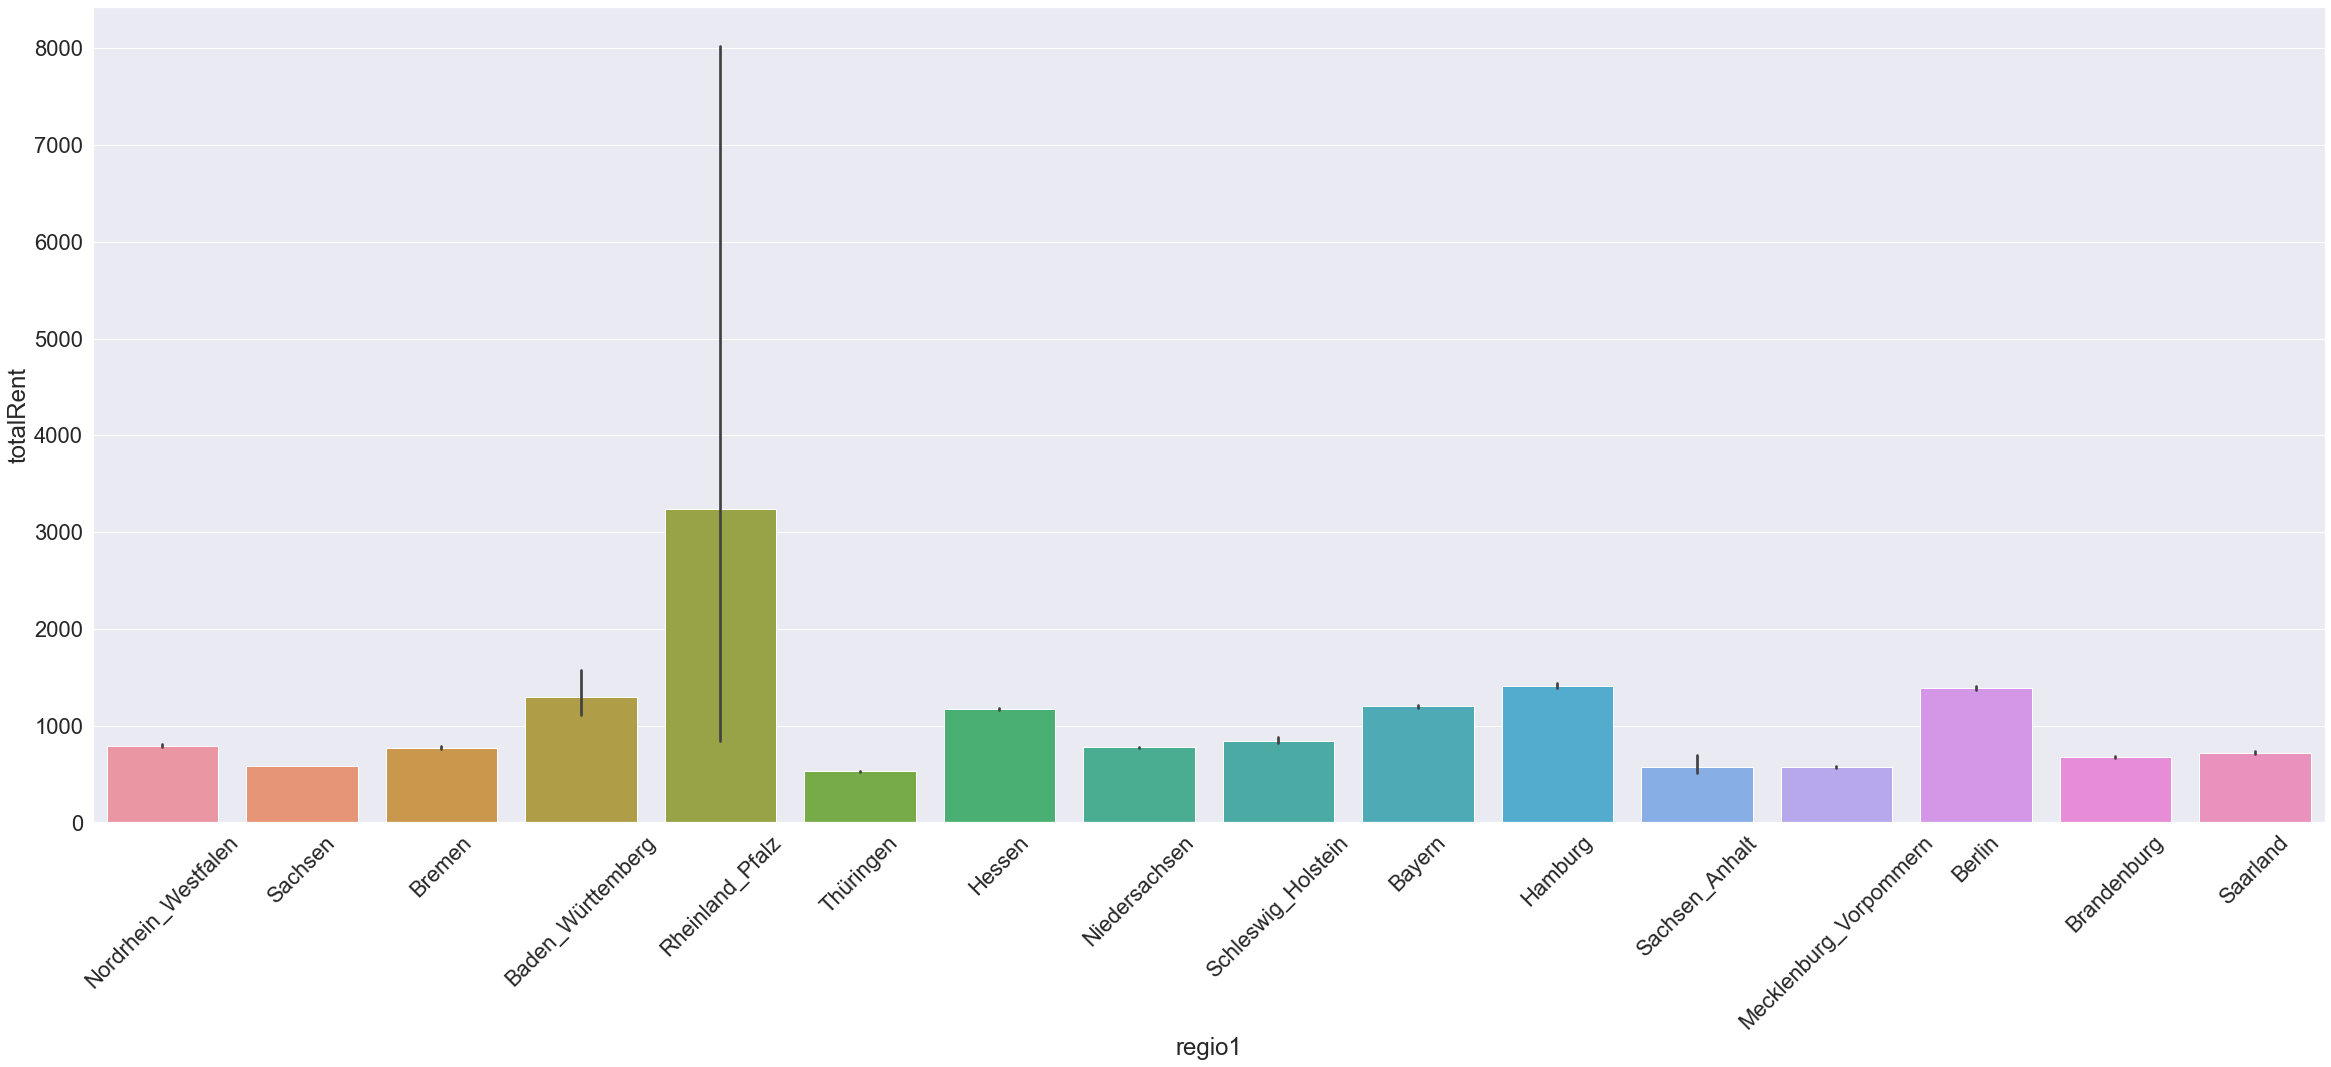

In [152]:
fig = plt.figure(figsize=(40, 15))
sns.set_style('darkgrid')
sns.barplot(x='regio1', y='totalRent', data=data)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'central_heating'),
  Text(1, 0, 'floor_heating'),
  Text(2, 0, 'self_contained_central_heating'),
  Text(3, 0, 'oil_heating'),
  Text(4, 0, 'gas_heating'),
  Text(5, 0, 'district_heating'),
  Text(6, 0, 'wood_pellet_heating'),
  Text(7, 0, 'electric_heating'),
  Text(8, 0, 'combined_heat_and_power_plant'),
  Text(9, 0, 'heat_pump'),
  Text(10, 0, 'night_storage_heater'),
  Text(11, 0, 'stove_heating'),
  Text(12, 0, 'solar_heating')])

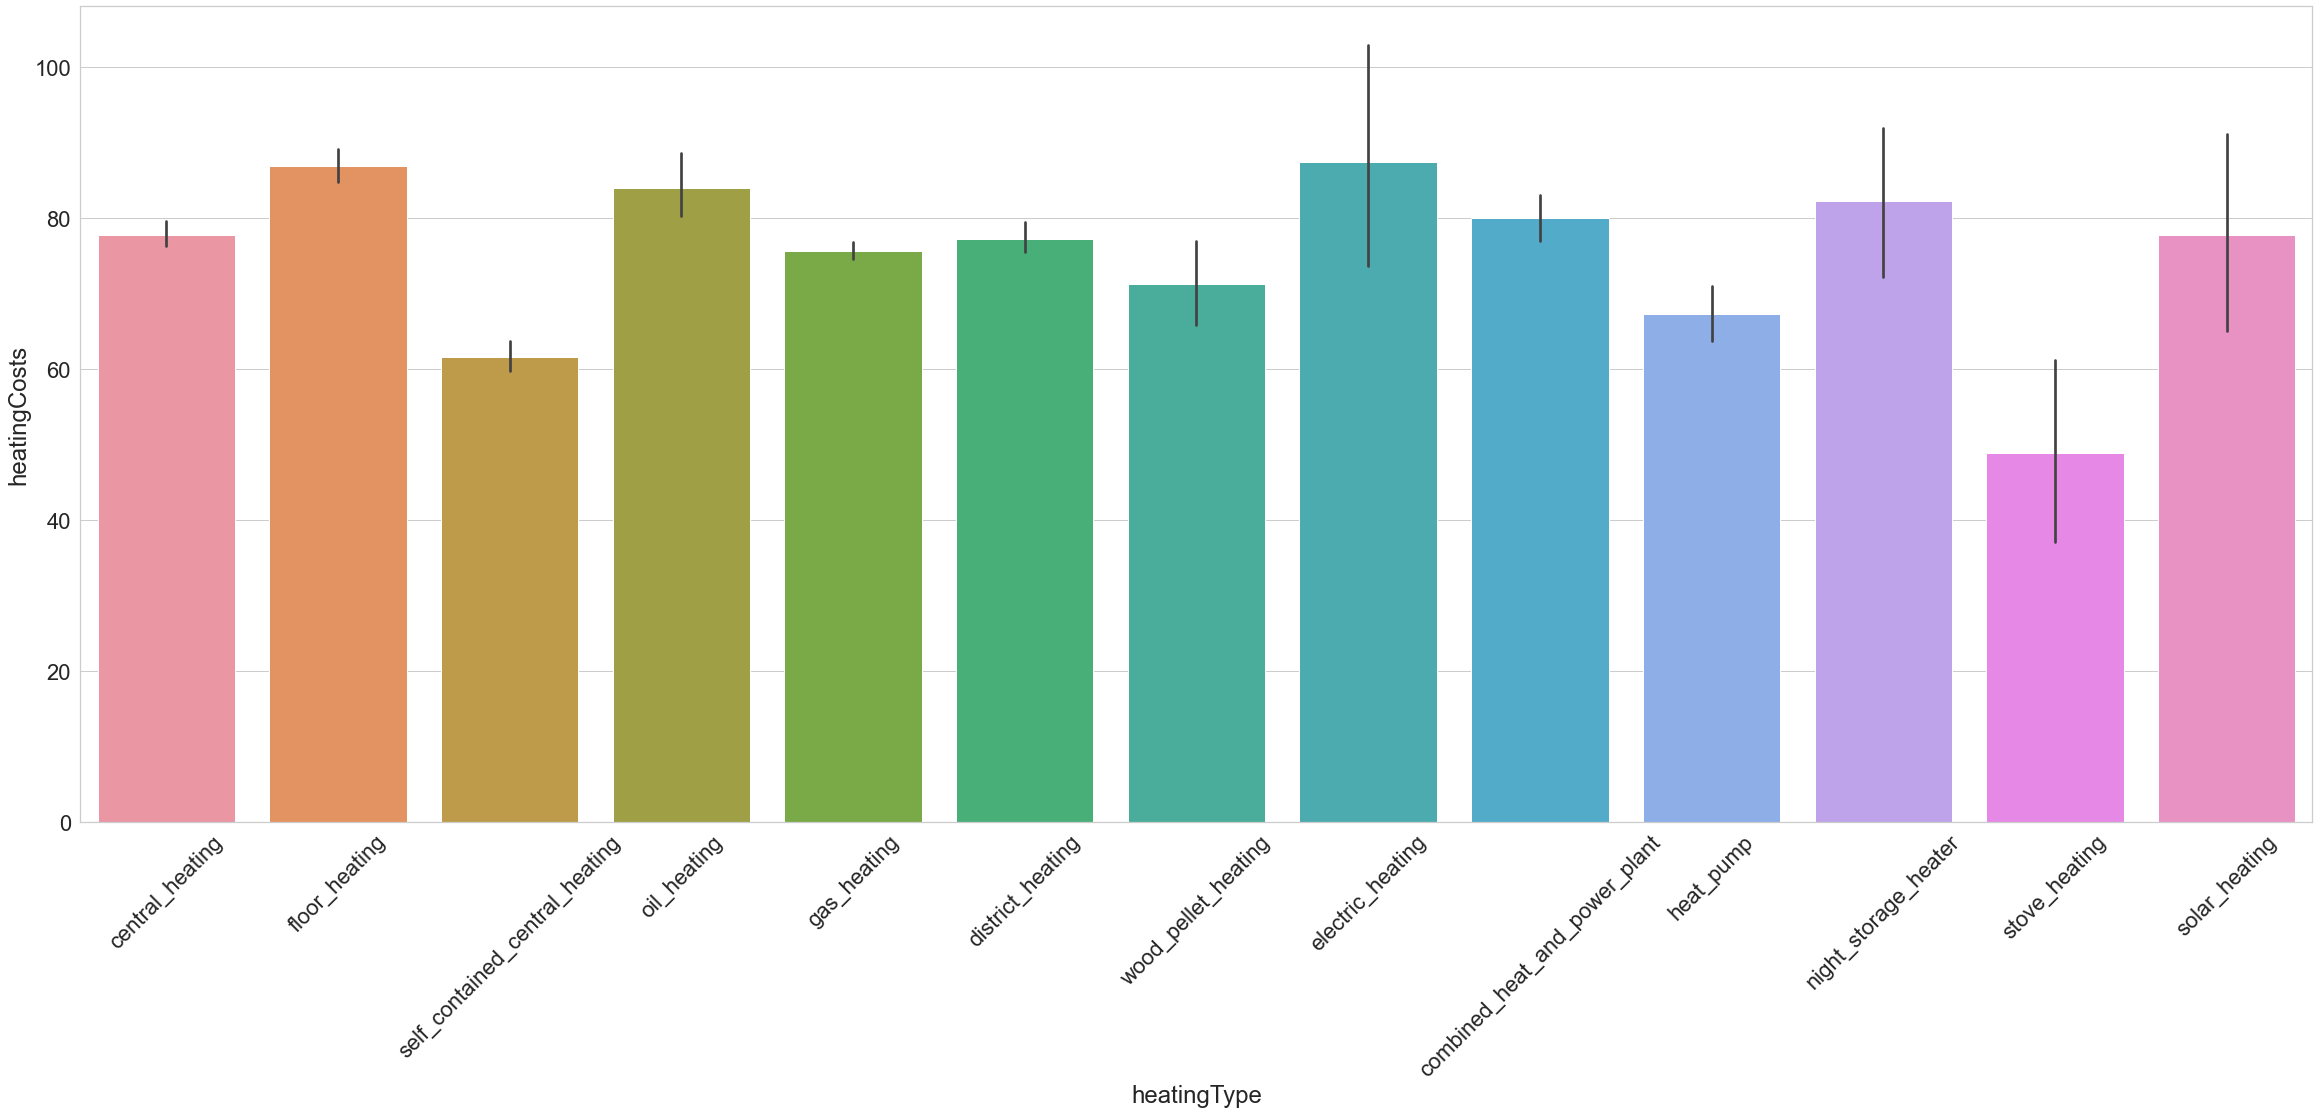

In [116]:
fig = plt.figure(figsize=(40, 15))
sns.set_style('whitegrid')
sns.barplot(x='heatingType', y='heatingCosts', data=data)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='energyEfficiencyClass', ylabel='electricityKwhPrice'>

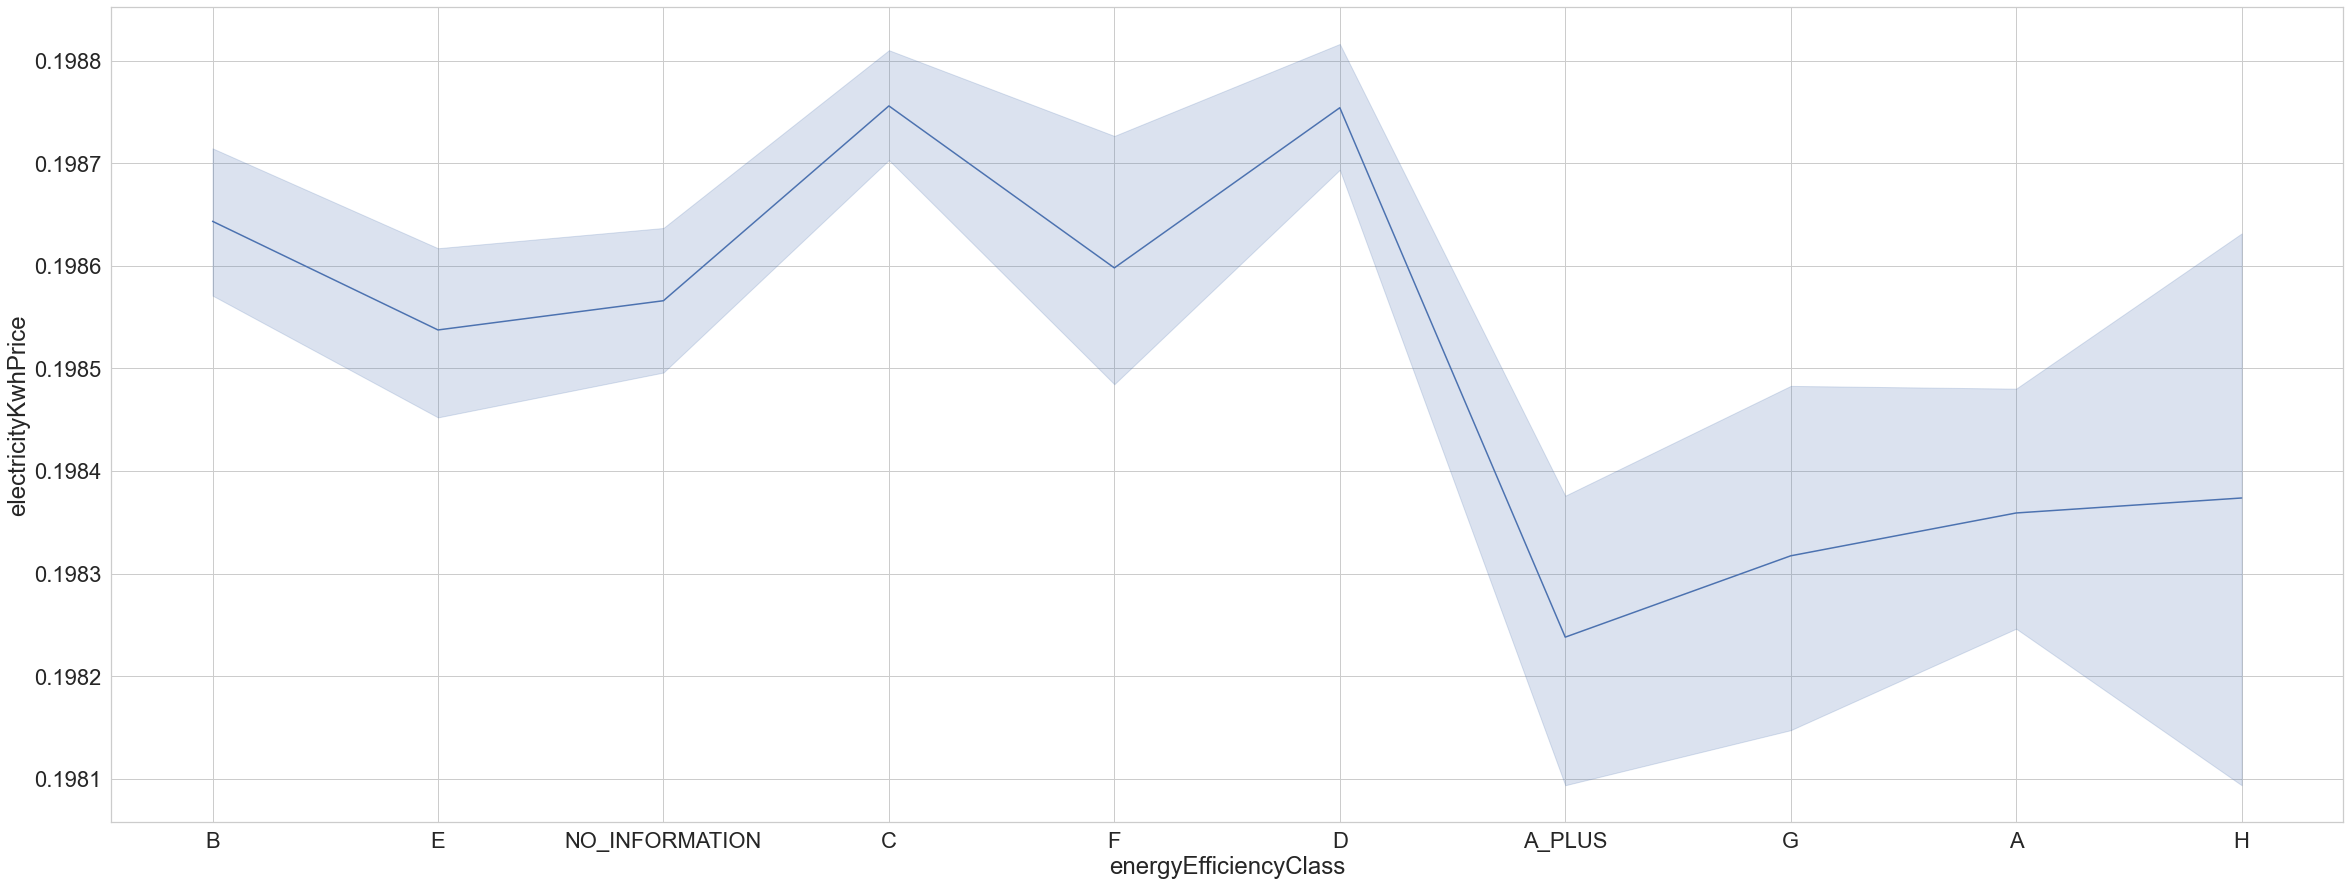

In [123]:
fig = plt.figure(figsize=(40, 15))
sns.set_style('whitegrid')
sns.lineplot(x='energyEfficiencyClass', y='electricityKwhPrice', data=data)